# ML4E Induction Task

## Wine Quality Prediction using machine learning models

In [10]:
#importing libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
#import the models from sklearn

In [15]:
#to avoid warnings
from warnings import filterwarnings
filterwarnings(action = 'ignore')

### import dataset

In [19]:
winedata = pd.read_csv("winedata.csv",delimiter =';')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
winedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### null values identification

In [22]:
winedata.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [25]:
print(f"the data set is with {winedata.shape} size")

the data set is with (4898, 12) size


In [27]:
winedata.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [108]:
#regular exploratory data analysis and plotting libraries

#### drawing some plots to explore data

In [28]:
winedata['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

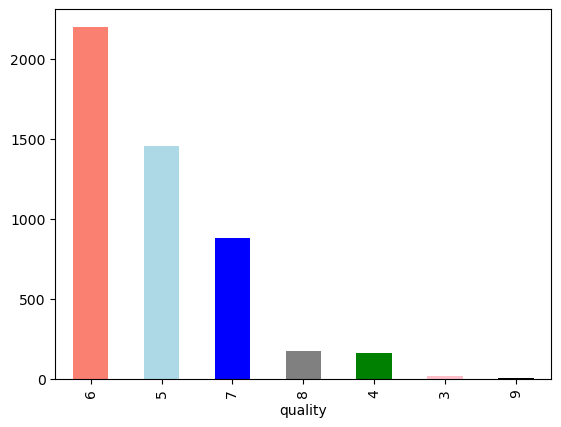

In [33]:
winedata['quality'].value_counts().plot(kind ="bar",color = ["salmon","lightblue","blue","grey","green","pink","black"]);

In [34]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [37]:
winedata.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


we cannot see any correlation nearer to 0.9 so have to try something else

trying heatmap

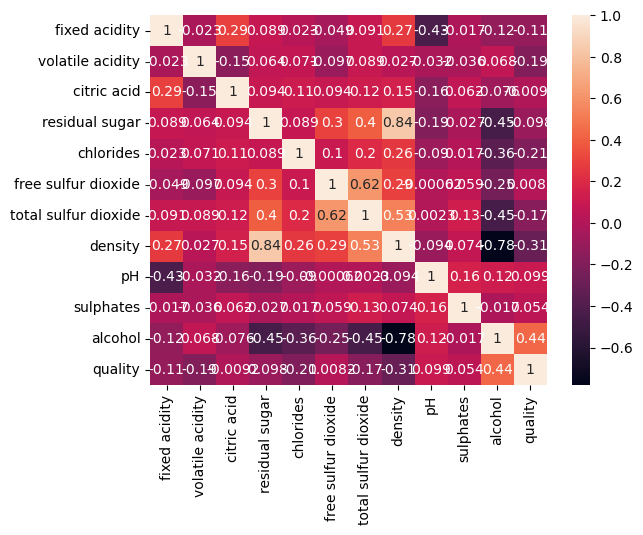

In [58]:
correlation = winedata.corr()
sns.heatmap(correlation ,annot = True)
plt.show()

0.84,-0.78 are some good amount of correlation coeffecient

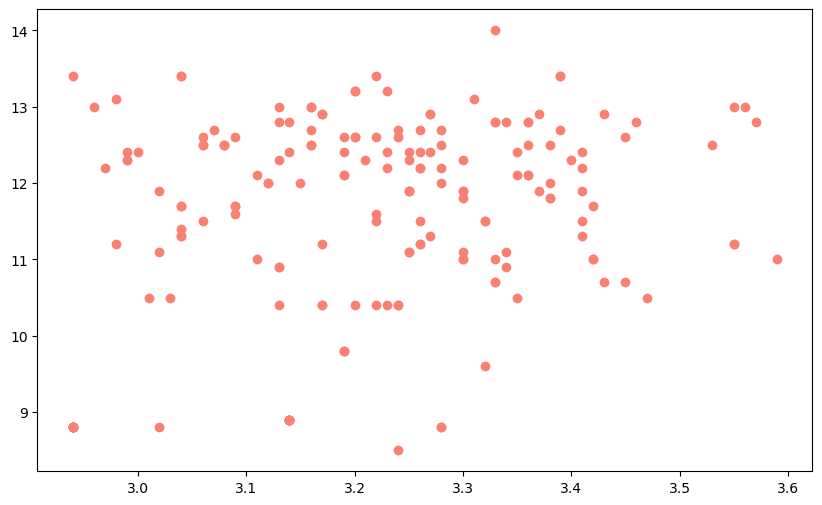

In [44]:
plt.figure(figsize = (10,6))

plt.scatter(winedata.pH[winedata.quality>7],
           winedata.alcohol[winedata.quality>7],
           color = "salmon")


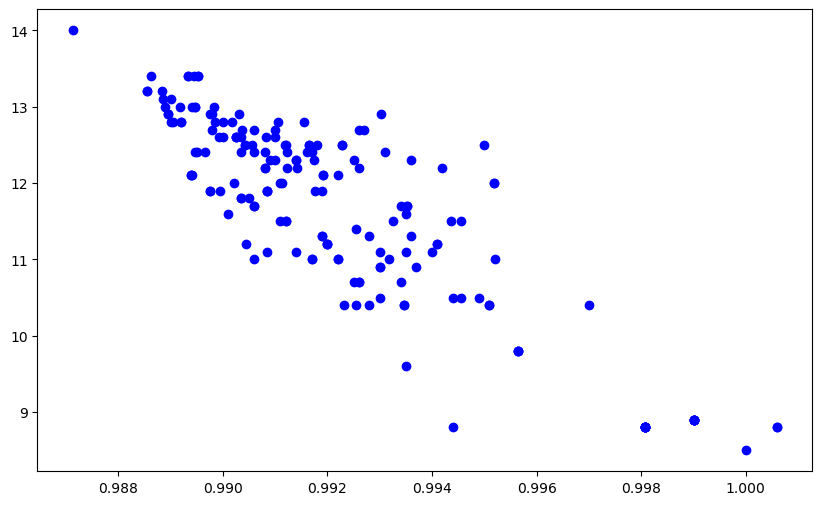

In [45]:
plt.figure(figsize = (10,6))

plt.scatter(winedata.density[winedata.quality>7],
           winedata.alcohol[winedata.quality>7],
           color = "blue")

#here we observe a good amount of corelation among the attributes

<Axes: ylabel='Frequency'>

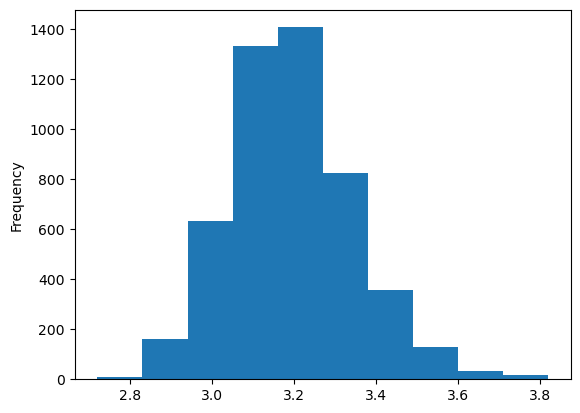

In [47]:
#lets try histograms
winedata.pH.plot.hist()

#### observing the distribution of quality in dataset

<Axes: xlabel='quality', ylabel='Density'>

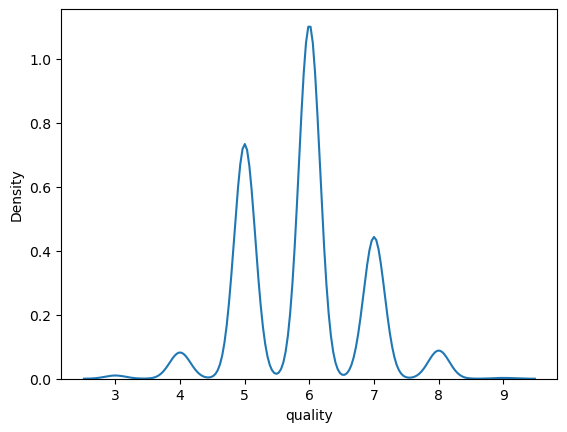

In [53]:
sns.kdeplot(winedata.query('quality>=3').quality)

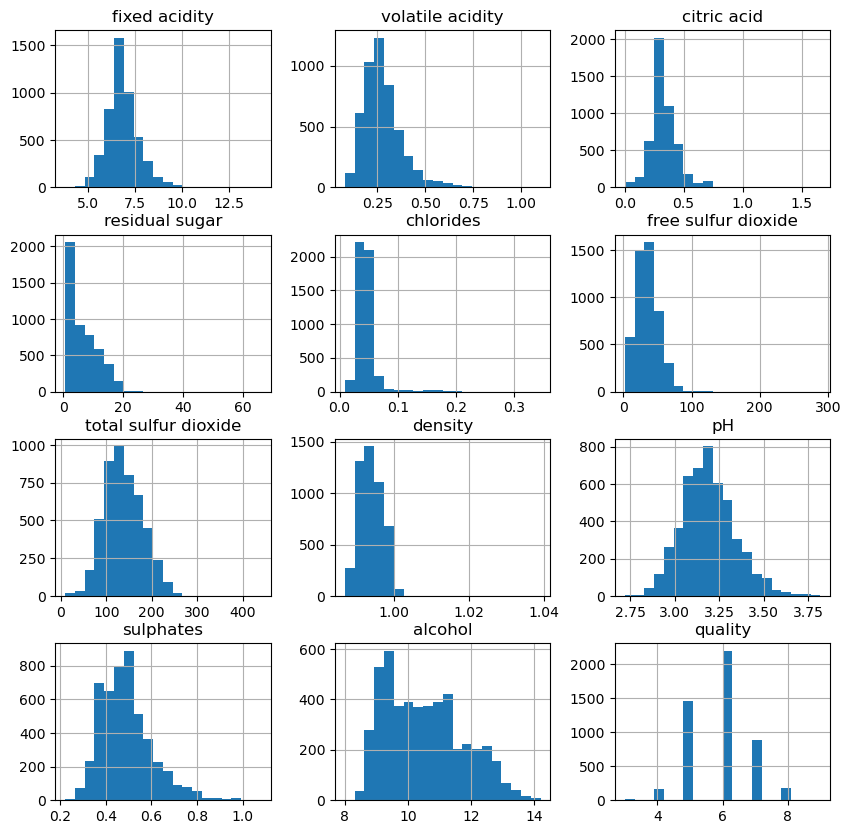

In [54]:
winedata.hist(bins = 20,figsize = (10,10))
plt.show()

#to decrease the no of variables lets again draw heatmap with corr > 0.75

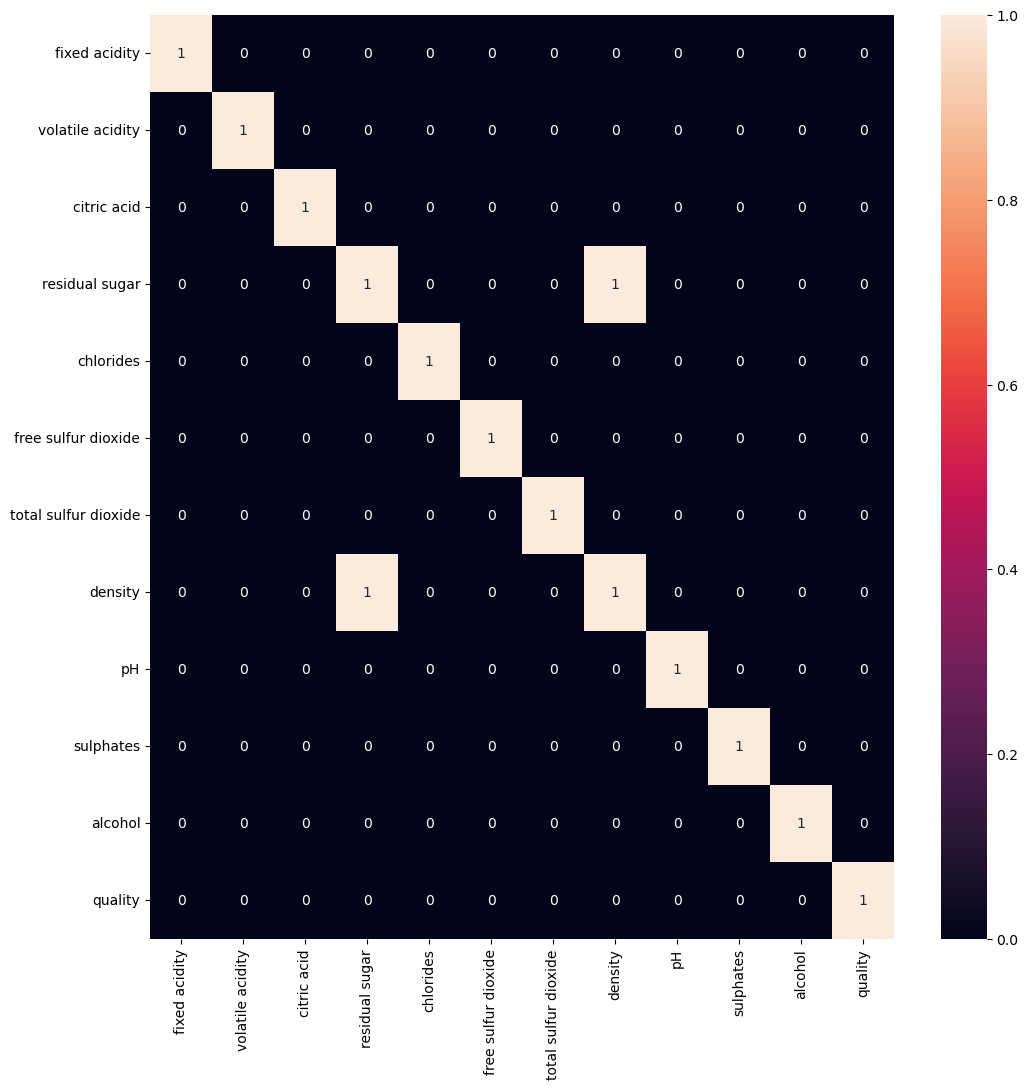

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation > 0.75,annot = True)
plt.show()

#### *as density and residual sugar are highly correlated we can remove one among them

#### *to decide which one to remove we shall find corr of them with target

In [68]:
corrA = winedata['residual sugar'].corr(winedata['quality'])
corrB = winedata['density'].corr(winedata['quality'])
print(f"Correlation of 'residual sugar' with quality is {corrA}, 'density' with quality is {corrB}.")


Correlation of 'residual sugar' with quality is -0.09757682889469312, 'density' with quality is -0.3071233127347304.


#### as density is more correlated we shall keep it and drop the residual sugar column

In [69]:
winedata = winedata.drop("residual sugar",axis = 1)

In [70]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


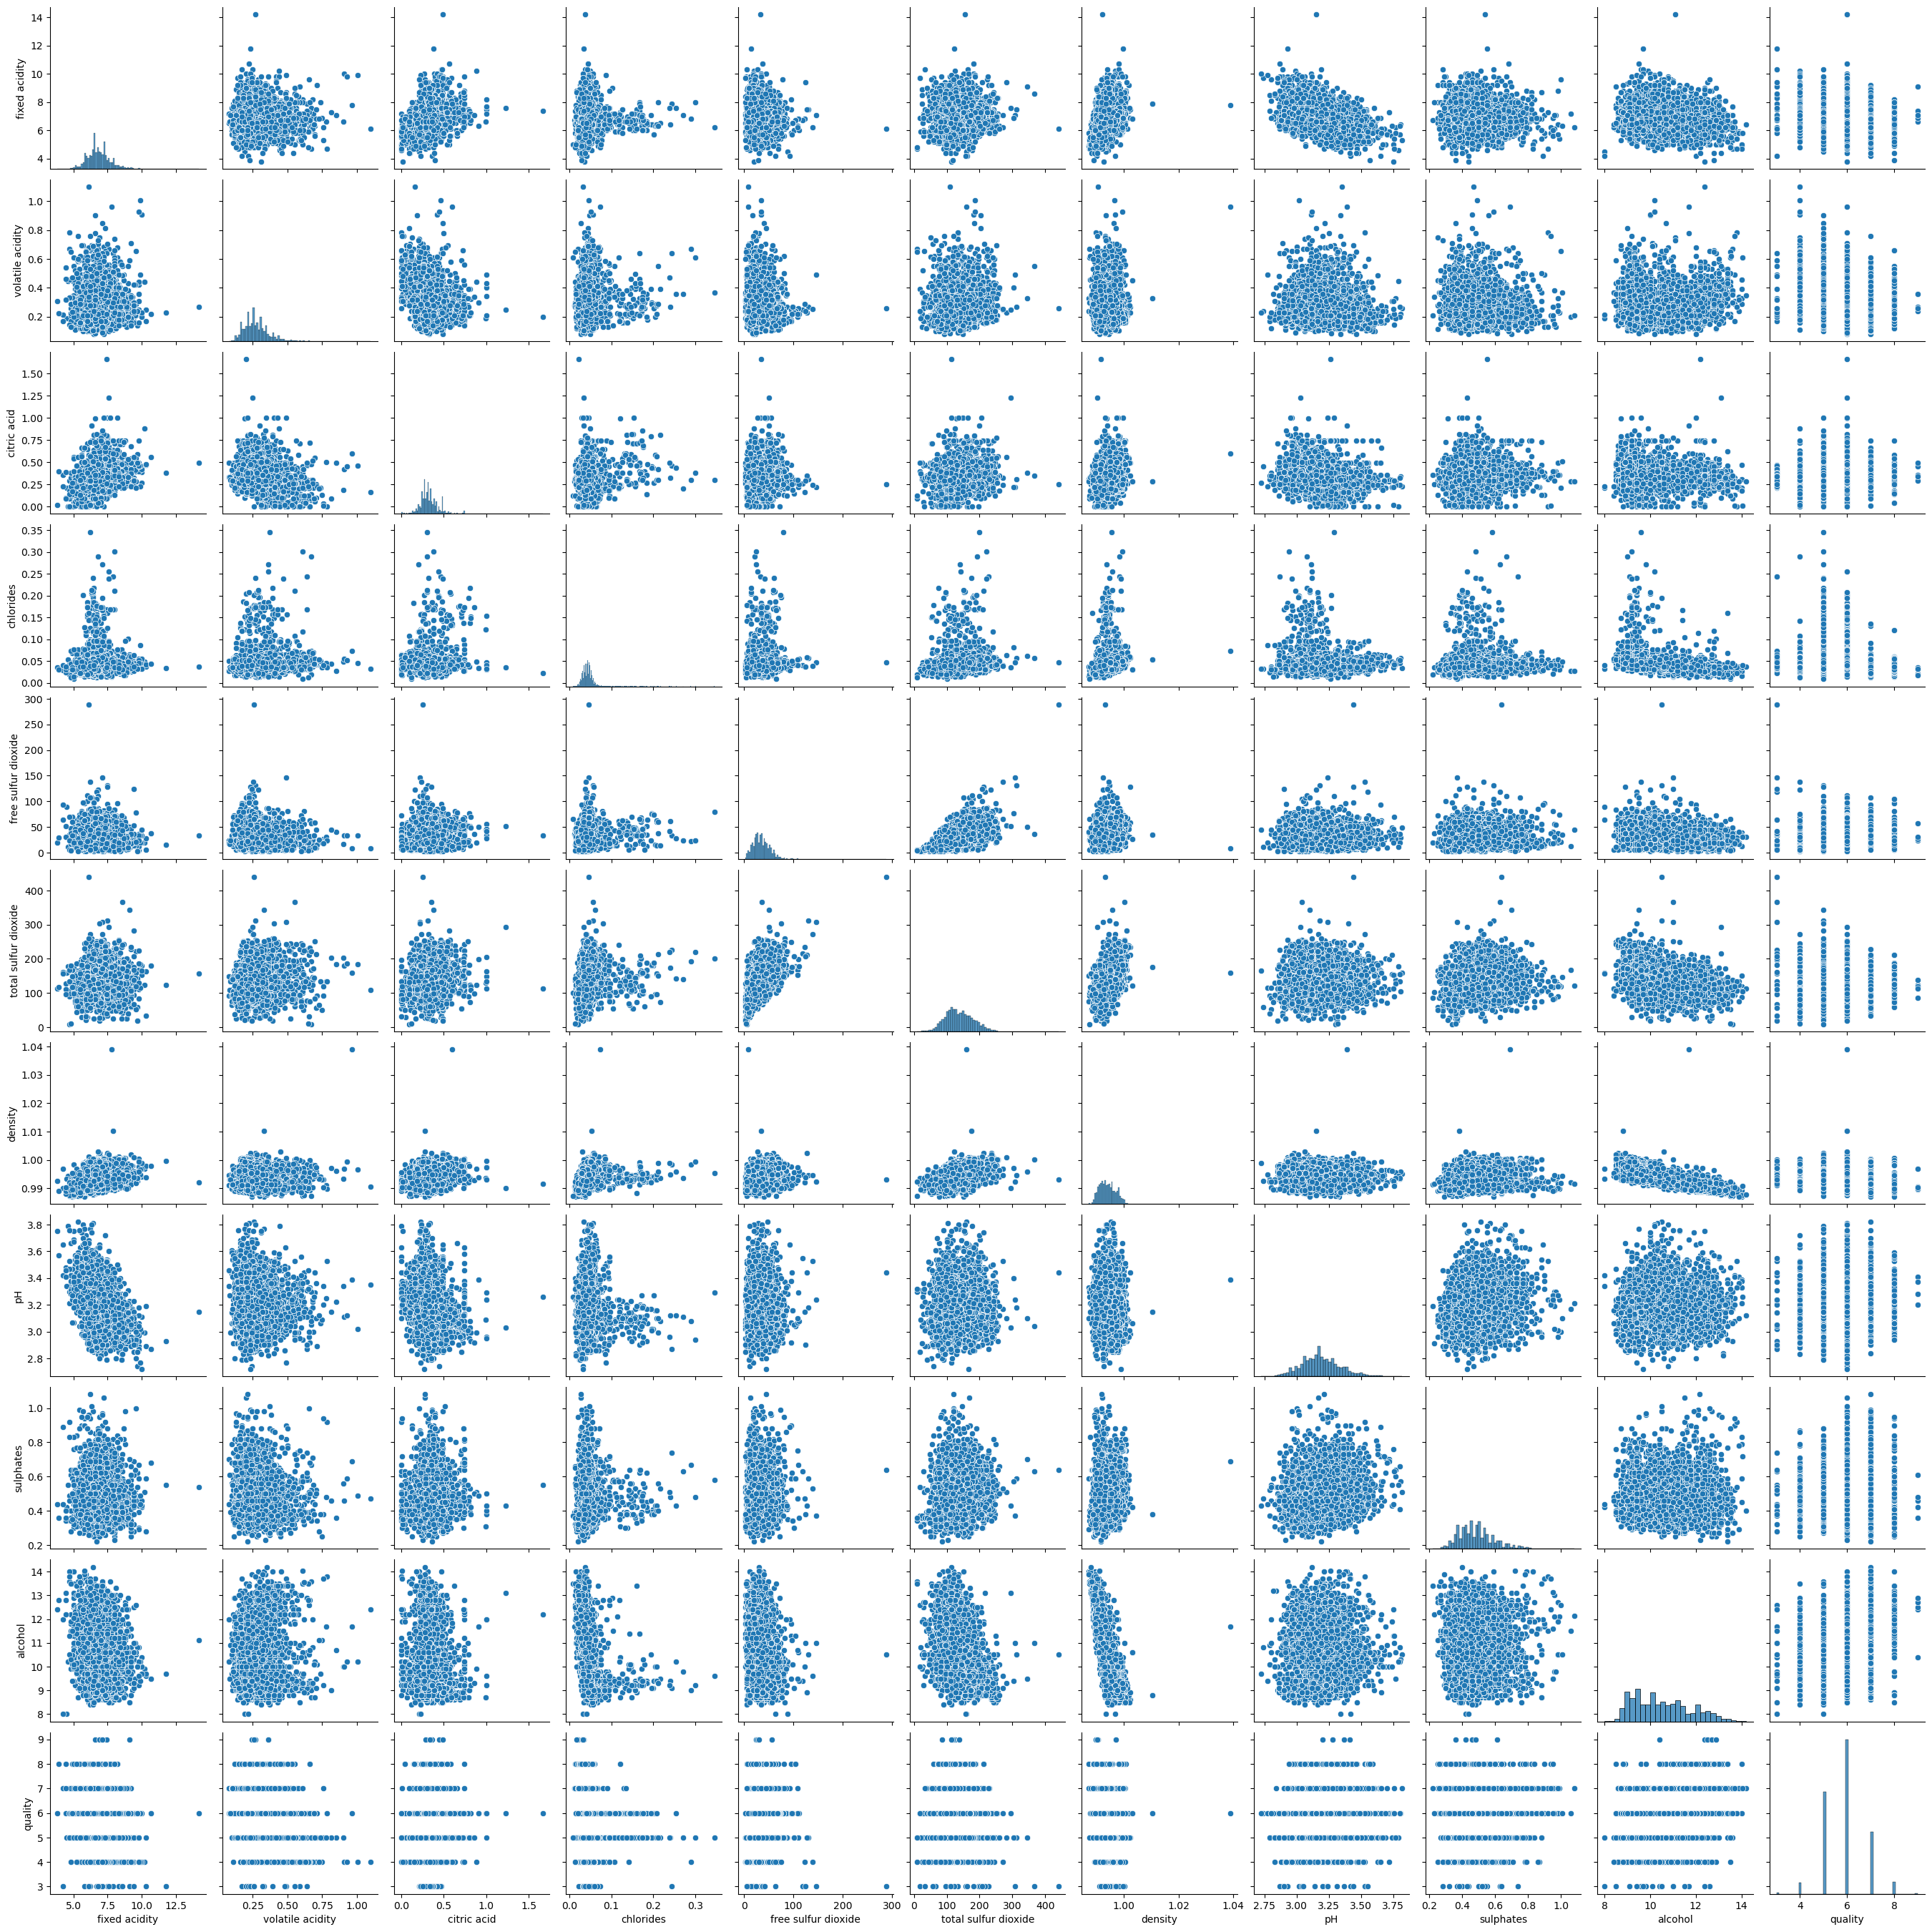

In [71]:
sns.pairplot(winedata)

## Feature Selection

In [72]:
#dviding the data into X and Y
winedata["goodquality"] = [1 if x>=7 else 0 for x in winedata["quality"]]
winedata['goodquality'].value_counts()

goodquality
0    3838
1    1060
Name: count, dtype: int64

In [73]:
X = winedata.drop(["quality","goodquality"],axis = 1)
Y = winedata["goodquality"]

In [74]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [75]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: goodquality, dtype: int64

In [78]:
#knowing the feature importance using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,Y)
feature_importance = clf.feature_importances_

#printing values
for i,importance in enumerate(feature_importance):
    print(f"Feature {i}: {importance:.2f}")

Feature 0: 0.08
Feature 1: 0.09
Feature 2: 0.08
Feature 3: 0.09
Feature 4: 0.09
Feature 5: 0.09
Feature 6: 0.13
Feature 7: 0.09
Feature 8: 0.09
Feature 9: 0.17


## Spliting Data

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

now we shall use some ML models to find which one gives better accuracy

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {"logistic regression":LogisticRegression(),
                   "KNN":KNeighborsClassifier(n_neighbors = 4),
                   "random forest":RandomForestClassifier(random_state = 1),
                   "svc":SVC(),
                   "Gaussian NB":GaussianNB()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)
        
        
    return model_scores


In [85]:
model_scores = fit_and_score(models = models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)

In [86]:
model_scores

{'logistic regression': 0.8081632653061225,
 'KNN': 0.7908163265306123,
 'random forest': 0.8642857142857143,
 'svc': 0.7969387755102041,
 'Gaussian NB': 0.7418367346938776}

### model comparision

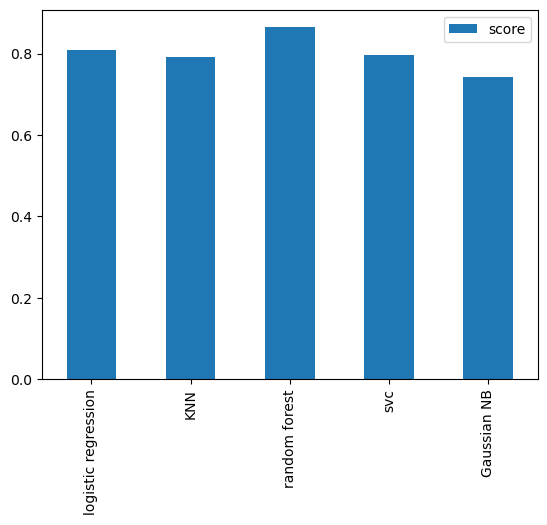

In [89]:
model_compare = pd.DataFrame(model_scores,index = ["score"])
model_compare.T.plot.bar();

we got a baseline model comparision 

tuning RandomForest


### hyperarameter tuning

In [90]:
train_scores = []
test_scores = []

random = range(1,10)
rfc = RandomForestClassifier()

for i in random:
    rfc.set_params(random_state = i)
    rfc.fit(X_train,Y_train)
    train_scores.append(rfc.score(X_train,Y_train))
    test_scores.append(rfc.score(X_test,Y_test))


In [92]:
test_scores

[0.8642857142857143,
 0.8704081632653061,
 0.8663265306122448,
 0.8724489795918368,
 0.8673469387755102,
 0.8653061224489796,
 0.8673469387755102,
 0.8673469387755102,
 0.8581632653061224]

maximum RFC score on test data : 87.24%


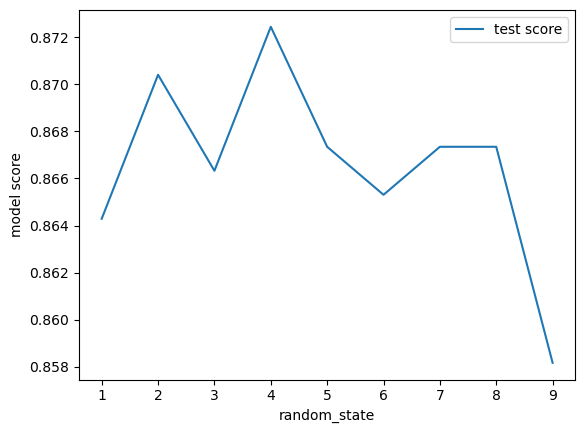

In [93]:
plt.plot(random,test_scores,label = "test score")
plt.xlabel("random_state")
plt.ylabel("model score")
plt.legend()

print(f"maximum RFC score on test data : {max(test_scores)*100:.2f}%")

### since we get highest accuracy for random_state = 4, we shall take this as our model

In [99]:
final_model = RandomForestClassifier(random_state = 4)

In [101]:
final_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=4)

In [102]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_preds = final_model.predict(X_test)
accuracy = accuracy_score(Y_test,y_preds)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("F1_score: ",f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)

F1_score:  0.8503632905622857
Recall: 0.8581632653061224
Precision: 0.8488259159085321
Accuracy: 0.8724489795918368


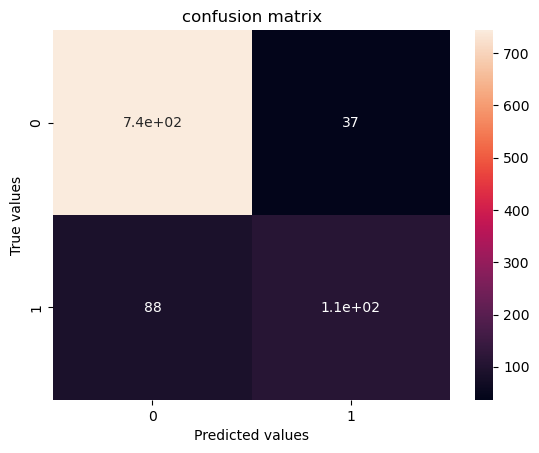

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_preds)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('confusion matrix')
plt.show()

## This shows that our model is good at predicting quality of wine